In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight

In [68]:
data=pd.read_csv('/content/drive/MyDrive/watson_healthcare_modified.csv')

In [69]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [71]:
data.StandardHours.value_counts()

80    1676
Name: StandardHours, dtype: int64

In [72]:
data.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [73]:
data.drop(['DailyRate','HourlyRate','MonthlyRate','PercentSalaryHike','EmployeeID','Over18','EmployeeCount','StandardHours','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance'],axis='columns',inplace=True)


In [74]:
data.duplicated().sum()

56

In [75]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,Cardiology,1,2,Life Sciences,2,Female,3,...,5993,8,Yes,0,8,0,6,4,0,5
1,49,No,Travel_Frequently,Maternity,8,1,Life Sciences,3,Male,2,...,5130,1,No,1,10,3,10,7,1,7
2,37,Yes,Travel_Rarely,Maternity,2,2,Other,4,Male,2,...,2090,6,Yes,0,7,3,0,0,0,0
3,33,No,Travel_Frequently,Maternity,3,4,Life Sciences,4,Female,3,...,2909,1,Yes,0,8,3,8,7,3,0
4,27,No,Travel_Rarely,Maternity,2,1,Medical,1,Male,3,...,3468,9,No,1,6,3,2,2,2,2


In [76]:
column=['Attrition','OverTime']

In [77]:
for col in column:
  data[col].replace({'Yes':1,'No':0},inplace=True)

In [78]:
def col_unique(d):
  for col in d:
    print(col,":",d[col].unique())


In [79]:
col_unique(data)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : [0 1]
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Cardiology' 'Maternity' 'Neurology']
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction : [2 3 4 1]
Gender : ['Female' 'Male']
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobRole : ['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']
JobSatisfaction : [4 2 3 1]
MaritalStatus : ['Single' 'Married' 'Divorced']
MonthlyIncome : [ 5993  5130  2090 ... 12742  9071  2836]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
OverTime : [1 0]
Shift : [0 1 3 2]
TotalWorkingYears : [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 2

In [80]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,Cardiology,1,2,Life Sciences,2,Female,3,...,5993,8,1,0,8,0,6,4,0,5
1,49,0,Travel_Frequently,Maternity,8,1,Life Sciences,3,Male,2,...,5130,1,0,1,10,3,10,7,1,7
2,37,1,Travel_Rarely,Maternity,2,2,Other,4,Male,2,...,2090,6,1,0,7,3,0,0,0,0
3,33,0,Travel_Frequently,Maternity,3,4,Life Sciences,4,Female,3,...,2909,1,1,0,8,3,8,7,3,0
4,27,0,Travel_Rarely,Maternity,2,1,Medical,1,Male,3,...,3468,9,0,1,6,3,2,2,2,2


In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1676.0,36.866348,9.129126,18.0,30.00,36.0,43.00,60.0
Attrition,1676.0,0.118735,0.323573,0.0,0.00,0.0,0.00,1.0
DistanceFromHome,1676.0,9.221957,8.158118,1.0,2.00,7.0,14.00,29.0
Education,1676.0,2.907518,1.025835,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1676.0,2.714797,1.097534,1.0,2.00,3.0,4.00,4.0
JobInvolvement,1676.0,2.724940,0.714121,1.0,2.00,3.0,3.00,4.0
JobLevel,1676.0,2.066826,1.113423,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1676.0,2.738663,1.104005,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,1676.0,6516.512530,4728.456618,1009.0,2928.25,4899.0,8380.25,19999.0
NumCompaniesWorked,1676.0,2.662291,2.477704,0.0,1.00,2.0,4.00,9.0


In [82]:
data.corr()

<ipython-input-82-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,Shift,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.239984,-0.010079,0.204655,0.008945,0.034193,0.518333,-0.015848,0.511378,0.296045,0.030970,0.037117,0.692512,-0.015408,0.319012,0.222655,0.217212,0.215909
Attrition,-0.239984,1.000000,0.105580,-0.038843,-0.101278,-0.166036,-0.207634,-0.081881,-0.193527,0.017279,0.337383,-0.158322,-0.234182,-0.054836,-0.201373,-0.207891,-0.086207,-0.201087
DistanceFromHome,-0.010079,0.105580,1.000000,0.015937,-0.019730,0.010281,-0.023455,-0.004758,-0.041201,-0.024969,0.038182,0.029180,-0.017663,-0.055471,-0.007420,0.011448,-0.000126,0.000403
Education,0.204655,-0.038843,0.015937,1.000000,-0.031925,0.041046,0.093227,-0.003957,0.085116,0.126758,-0.025776,0.024451,0.143324,-0.014070,0.057461,0.051029,0.045785,0.055096
EnvironmentSatisfaction,0.008945,-0.101278,-0.019730,-0.031925,1.000000,-0.007220,0.008277,0.001518,0.003372,0.012640,0.076885,0.005283,0.000208,-0.017722,-0.000448,0.012241,0.005866,-0.012417
JobInvolvement,0.034193,-0.166036,0.010281,0.041046,-0.007220,1.000000,-0.013660,-0.039738,-0.019240,0.016303,-0.014960,0.025999,-0.001576,-0.031580,-0.013652,0.020541,-0.022153,0.031574
JobLevel,0.518333,-0.207634,-0.023455,0.093227,0.008277,-0.013660,1.000000,-0.012497,0.951572,0.153179,0.006171,0.010478,0.780929,-0.004251,0.532529,0.387624,0.343102,0.379717
JobSatisfaction,-0.015848,-0.081881,-0.004758,-0.003957,0.001518,-0.039738,-0.012497,1.000000,-0.016550,-0.067204,0.017259,0.017740,-0.021435,-0.003440,0.005376,-0.001337,-0.013595,-0.023042
MonthlyIncome,0.511378,-0.193527,-0.041201,0.085116,0.003372,-0.019240,0.951572,-0.016550,1.000000,0.159062,0.011969,0.005847,0.772938,-0.009690,0.513977,0.364152,0.337241,0.350122
NumCompaniesWorked,0.296045,0.017279,-0.024969,0.126758,0.012640,0.016303,0.153179,-0.067204,0.159062,1.000000,-0.016159,0.023164,0.250514,-0.056122,-0.108807,-0.080578,-0.025033,-0.093030


In [83]:
#  data.drop('PercentSalaryHike',inplace=True,axis=1)

In [84]:
#  data.drop('PerformanceRating',inplace=True,axis=1)

In [85]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [86]:
cols= ['BusinessTravel','Department','EducationField','MaritalStatus','JobRole']

In [87]:
data=pd.get_dummies(data=data,columns=cols)

In [88]:
data.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist
0,41,0,1,2,2,0,3,2,4,5993,...,0,0,0,0,1,0,0,1,0,0
1,49,0,8,1,3,1,2,2,2,5130,...,0,0,0,1,0,0,0,0,1,0
2,37,1,2,2,4,1,2,1,3,2090,...,1,0,0,0,1,0,0,1,0,0
3,33,0,3,4,4,0,3,1,3,2909,...,0,0,0,1,0,0,0,0,1,0
4,27,0,2,1,1,1,3,1,2,3468,...,0,0,0,1,0,0,0,1,0,0


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Age                               1676 non-null   int64
 1   Attrition                         1676 non-null   int64
 2   DistanceFromHome                  1676 non-null   int64
 3   Education                         1676 non-null   int64
 4   EnvironmentSatisfaction           1676 non-null   int64
 5   Gender                            1676 non-null   int64
 6   JobInvolvement                    1676 non-null   int64
 7   JobLevel                          1676 non-null   int64
 8   JobSatisfaction                   1676 non-null   int64
 9   MonthlyIncome                     1676 non-null   int64
 10  NumCompaniesWorked                1676 non-null   int64
 11  OverTime                          1676 non-null   int64
 12  Shift                             

In [90]:
col_unique(data)

Age : [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition : [0 1]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
Gender : [0 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
MonthlyIncome : [ 5993  5130  2090 ... 12742  9071  2836]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
OverTime : [1 0]
Shift : [0 1 3 2]
TotalWorkingYears : [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
YearsAtCompany : [ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  

In [91]:
columns_to_scale = ['Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','Shift','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
scaler=MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [92]:
col_unique(data)

Age : [0.54761905 0.73809524 0.45238095 0.35714286 0.21428571 0.33333333
 0.97619048 0.28571429 0.47619048 0.42857143 0.4047619  0.26190476
 0.30952381 0.38095238 0.23809524 0.0952381  0.83333333 0.14285714
 0.07142857 0.57142857 0.61904762 0.66666667 0.5        0.5952381
 0.76190476 0.19047619 0.71428571 0.88095238 0.64285714 0.9047619
 0.11904762 0.78571429 0.52380952 0.85714286 0.95238095 0.04761905
 0.16666667 0.02380952 0.92857143 0.80952381 0.69047619 0.
 1.        ]
Attrition : [0 1]
DistanceFromHome : [0.         0.25       0.03571429 0.07142857 0.82142857 0.78571429
 0.92857143 0.53571429 0.5        0.89285714 0.64285714 0.71428571
 0.14285714 0.35714286 0.28571429 0.21428571 0.17857143 0.32142857
 0.10714286 0.85714286 0.39285714 0.60714286 1.         0.75
 0.46428571 0.67857143 0.96428571 0.57142857 0.42857143]
Education : [0.25 0.   0.75 0.5  1.  ]
EnvironmentSatisfaction : [0.33333333 0.66666667 1.         0.        ]
Gender : [0 1]
JobInvolvement : [0.66666667 0.33333333 

In [93]:
X=data.drop('Attrition', axis= 'columns')
y=data['Attrition']

In [94]:
X.shape

(1676, 38)

In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1676 non-null   float64
 1   DistanceFromHome                  1676 non-null   float64
 2   Education                         1676 non-null   float64
 3   EnvironmentSatisfaction           1676 non-null   float64
 4   Gender                            1676 non-null   int64  
 5   JobInvolvement                    1676 non-null   float64
 6   JobLevel                          1676 non-null   float64
 7   JobSatisfaction                   1676 non-null   float64
 8   MonthlyIncome                     1676 non-null   float64
 9   NumCompaniesWorked                1676 non-null   float64
 10  OverTime                          1676 non-null   int64  
 11  Shift                             1676 non-null   float64
 12  TotalW

In [96]:
X

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist
0,0.547619,0.000000,0.25,0.333333,0,0.666667,0.25,1.000000,0.262454,0.888889,...,0,0,0,0,1,0,0,1,0,0
1,0.738095,0.250000,0.00,0.666667,1,0.333333,0.25,0.333333,0.217009,0.111111,...,0,0,0,1,0,0,0,0,1,0
2,0.452381,0.035714,0.25,1.000000,1,0.333333,0.00,0.666667,0.056925,0.666667,...,1,0,0,0,1,0,0,1,0,0
3,0.357143,0.071429,0.75,1.000000,0,0.666667,0.00,0.666667,0.100053,0.111111,...,0,0,0,1,0,0,0,0,1,0
4,0.214286,0.035714,0.00,0.000000,1,0.666667,0.00,0.333333,0.129489,1.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0.190476,0.821429,0.50,0.666667,1,0.000000,0.00,1.000000,0.070090,0.111111,...,0,1,0,0,1,0,0,1,0,0
1672,0.666667,0.321429,0.50,0.666667,0,0.333333,0.50,1.000000,0.424539,0.222222,...,0,0,0,1,0,0,0,1,0,0
1673,0.047619,0.000000,0.50,1.000000,0,0.333333,0.00,0.333333,0.096209,0.111111,...,0,0,0,0,1,0,0,0,1,0
1674,0.500000,0.000000,0.00,1.000000,0,0.333333,0.75,1.000000,0.617852,0.111111,...,0,0,0,1,0,0,0,0,0,1


In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [98]:
X_train.shape

(1340, 38)

In [99]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
class_weights,class_weight_dict

(array([0.56731583, 4.21383648]), {0: 0.56731583403895, 1: 4.213836477987422})

In [100]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(38,), activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Fit the model
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
42/42 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8813
Epoch 2/500
42/42 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8813
Epoch 3/500
42/42 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8813
Epoch 4/500
42/42 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8813
Epoch 5/500
42/42 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8813
Epoch 6/500
42/42 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.8828
Epoch 7/500
42/42 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.8851
Epoch 8/500
42/42 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.8978
Epoch 9/500
42/42 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.9000
Epoch 10/500
42/42 [==============================] - 0s 7ms/step - loss: 0.2324 - accuracy: 0.9045
Epoch 11/

In [101]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9196


[0.22719717025756836, 0.9196428656578064]

In [102]:
y_test_pre=model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [104]:
y_pre=model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [105]:
y_pre[0]

array([0.00204776], dtype=float32)

In [106]:
y_predict = []
for i in y_pre:
  if i > 0.5:
    y_predict.append(1)
  else:
    y_predict.append(0)
y_predict= np.array(y_predict)

In [107]:
y_testt=np.array(y_test)

In [108]:
y_testt[311],y_predict[311]

(0, 0)

<Axes: >

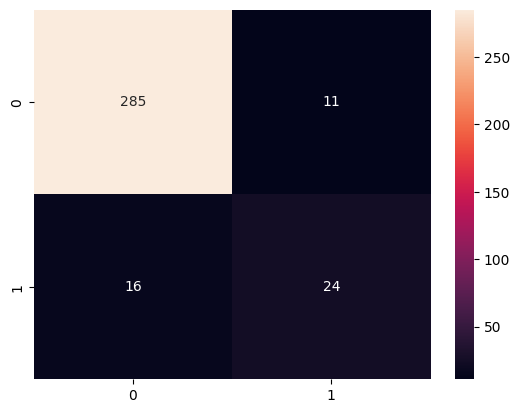

In [109]:
cm = tf.math.confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt='d')